# Explore SpectralTimeModel

<p>This notebook eplores the new SpectralTimeModel class

<p>created: March 8, 2024
<p>last modified:  March 8, 2024


#### Set-up

In [2]:
# auto-reload
%load_ext autoreload
%autoreload 2

In [1]:
# general
import numpy as np
import matplotlib.pyplot as plt
import os

from specparam import SpectralTimeModel

# custom
import sys
sys.path.append("../../code")
from paths import PROJECT_PATH, EXTERNAL_PATH
from info import SESSIONS, FS, N_ARRAYS, IDX_ZERO
from settings import SPECPARAM_SETTINGS

#### Functions

## Main

In [6]:
# load example file
fname = fr"{EXTERNAL_PATH}\data\lfp\lfp_tfr\A_SNR_041018\NSP1_array1_LFP.npz"
data_in = np.load(fname)
print(data_in.files)
tfr = data_in['tfr']
time = data_in['time']
freq = data_in['freq']
print(f"Shape tfr:\t{tfr.shape}")
print(f"Shape time:\t{time.shape}")
print(f"Shape freq:\t{freq.shape}")

['tfr', 'time', 'freq']
Shape tfr:	(64, 128, 500)
Shape time:	(500,)
Shape freq:	(128,)


(128, 500) (128,)
Fitting model across 500 power spectra.

	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                           TIME RESULTS                                           
                                                                                                  
                                 Number of time windows fit: 500                                  
                                                                                                  
                       The model was run on the frequency range 4 - 100 Hz                        
                                 Frequency Resolution is 0.76 Hz                          

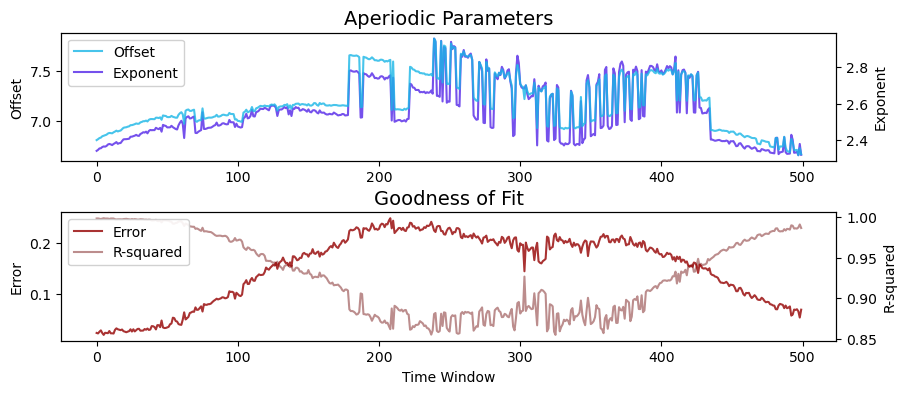

In [7]:
# apply SpectralTimeModel
spec = tfr[0]
print(spec.shape, freq.shape)
stm = SpectralTimeModel(**SPECPARAM_SETTINGS)
stm.report(freq, spec)

### ~